# KDE model
## Anomaly Detection in Time Series
### References 
* PEVNÝ, Tomáš. Outlier and anomaly detection. Department of Computers: Czech Technical University, 5 dez. 2016.
* ZHANG, Liangwei; LIN, Jing; KARIM, Ramin. Adaptive kernel density-based anomaly detection for nonlinear systems. Elsevier, 15 out. 2017.
* SAEED, Mehreen. Kernel Density Estimation in Python Using Scikit-Learn. Stack Abuse, 24 set. 2020.
* SCIKIT LEARN. Density Estimation.
* ROY, Bob Rupak. Anomaly Detection: KDE. Medium, 30 mar. 2022

In [7]:
import pandas as pd
from numpy import where, random, array, quantile
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
#load the KernelDensity Function from sklearn.neigbors
from sklearn.neighbors import KernelDensity
import numpy as np

In [8]:
df = pd.read_csv('sensor.csv', parse_dates=['timestamp'], index_col = 'timestamp').drop(columns=['Unnamed: 0'])

In [9]:
df

sensor_00  sensor_01  sensor_02  sensor_03   sensor_04  \
timestamp                                                                     
2018-04-01 00:00:00   2.465394   47.09201  53.211800  46.310760  634.375000   
2018-04-01 00:01:00   2.465394   47.09201  53.211800  46.310760  634.375000   
2018-04-01 00:02:00   2.444734   47.35243  53.211800  46.397570  638.888900   
2018-04-01 00:03:00   2.460474   47.09201  53.168400  46.397568  628.125000   
2018-04-01 00:04:00   2.445718   47.13541  53.211800  46.397568  636.458300   
...                        ...        ...        ...        ...         ...   
2018-08-31 23:55:00   2.407350   47.69965  50.520830  43.142361  634.722229   
2018-08-31 23:56:00   2.400463   47.69965  50.564240  43.142361  630.902771   
2018-08-31 23:57:00   2.396528   47.69965  50.520830  43.142361  625.925903   
2018-08-31 23:58:00   2.406366   47.69965  50.520832  43.142361  635.648100   
2018-08-31 23:59:00   2.396528   47.69965  50.520832  43.142361  639.814800   

                     sensor_05  sensor_06  sensor_07  sensor_08  sensor_09  \
timestamp                                                                    
2018-04-01 00:00:00   76.45975   13.41146   16.13136   15.56713   15.05353   
2018-04-01 00:01:00   76.45975   13.41146   16.13136   15.56713   15.05353   
2018-04-01 00:02:00   73.54598   13.32465   16.03733   15.61777   15.01013   
2018-04-01 00:03:00   76.98898   13.31742   16.24711   15.69734   15.08247   
2018-04-01 00:04:00   76.58897   13.35359   16.21094   15.69734   15.08247   
...                        ...        ...        ...        ...        ...   
2018-08-31 23:55:00   64.59095   15.11863   16.65220   15.65393   15.16204   
2018-08-31 23:56:00   65.83363   15.15480   16.70284   15.65393   15.11863   
2018-08-31 23:57:00   67.29445   15.08970   16.70284   15.69734   15.11863   
2018-08-31 23:58:00   65.09175   15.11863   16.56539   15.74074   15.11863   
2018-08-31 23:59:00   65.45634   15.11863   16.65220   15.65393   15.01013   

                     ...  sensor_43  sensor_44  sensor_45  sensor_46  \
timestamp            ...                                               
2018-04-01 00:00:00  ...   41.92708  39.641200   65.68287   50.92593   
2018-04-01 00:01:00  ...   41.92708  39.641200   65.68287   50.92593   
2018-04-01 00:02:00  ...   41.66666  39.351852   65.39352   51.21528   
2018-04-01 00:03:00  ...   40.88541  39.062500   64.81481   51.21528   
2018-04-01 00:04:00  ...   41.40625  38.773150   65.10416   51.79398   
...                  ...        ...        ...        ...        ...   
2018-08-31 23:55:00  ...   38.28125  68.287030   52.37268   48.32176   
2018-08-31 23:56:00  ...   38.28125  66.840280   50.63657   48.03241   
2018-08-31 23:57:00  ...   39.06250  65.393520   48.90046   48.03241   
2018-08-31 23:58:00  ...   40.62500  64.236110   47.74306   48.32176   
2018-08-31 23:59:00  ...   41.40625  62.789350   46.29630   48.90046   

                     sensor_47  sensor_48  sensor_49  sensor_50  sensor_51  \
timestamp                                                                    
2018-04-01 00:00:00  38.194440   157.9861   67.70834   243.0556   201.3889   
2018-04-01 00:01:00  38.194440   157.9861   67.70834   243.0556   201.3889   
2018-04-01 00:02:00  38.194443   155.9606   67.12963   241.3194   203.7037   
2018-04-01 00:03:00  38.194440   155.9606   66.84028   240.4514   203.1250   
2018-04-01 00:04:00  38.773150   158.2755   66.55093   242.1875   201.3889   
...                        ...        ...        ...        ...        ...   
2018-08-31 23:55:00  41.087960   212.3843  153.64580        NaN   231.1921   
2018-08-31 23:56:00  40.798610   213.8310  156.25000        NaN   231.1921   
2018-08-31 23:57:00  40.798610   217.3032  155.38190        NaN   232.0602   
2018-08-31 23:58:00  40.509258   222.5116  153.93520        NaN   234.0856   
2018-08-31 23:59:00  40.219910   227.4306  150.46300        NaN   234.0856   

                     machi

In [10]:
df = df.fillna(0).resample('120min').mean()

In [11]:
df

sensor_00  sensor_01  sensor_02  sensor_03   sensor_04  \
timestamp                                                                     
2018-04-01 00:00:00   2.454375  48.285950  53.124636  46.080366  634.178257   
2018-04-01 02:00:00   2.454096  48.823783  52.993344  45.405814  633.922030   
2018-04-01 04:00:00   2.453850  47.774160  52.839986  45.249926  634.333513   
2018-04-01 06:00:00   2.454293  47.073566  52.595122  45.012657  633.749027   
2018-04-01 08:00:00   2.453859  46.467374  52.370514  44.688584  635.079078   
...                        ...        ...        ...        ...         ...   
2018-08-31 14:00:00   2.408727  49.931278  52.721352  45.072698  631.766100   
2018-08-31 16:00:00   2.402791  50.811268  51.918763  44.438656  632.070784   
2018-08-31 18:00:00   2.342485  48.475837  49.829642  42.396193  615.983760   
2018-08-31 20:00:00   2.402660  48.555048  50.725549  43.420860  631.993052   
2018-08-31 22:00:00   2.402652  47.731842  50.564236  43.047597  632.041613   

                     sensor_05  sensor_06  sensor_07  sensor_08  sensor_09  \
timestamp                                                                    
2018-04-01 00:00:00  75.151163  13.478430  16.159394  15.707647  15.089459   
2018-04-01 02:00:00  74.136627  13.600500  16.160057  15.678229  15.091870   
2018-04-01 04:00:00  72.057675  13.594050  16.157284  15.700533  15.093256   
2018-04-01 06:00:00  74.168254  13.594653  16.159273  15.660687  15.086806   
2018-04-01 08:00:00  73.559189  13.348221  16.162348  15.677385  15.087711   
...                        ...        ...        ...        ...        ...   
2018-08-31 14:00:00  69.829906  15.109351  17.072543  16.087360  15.355720   
2018-08-31 16:00:00  76.638475  15.112003  17.166341  16.189235  15.357650   
2018-08-31 18:00:00  75.104954  14.744947  16.453210  15.470136  14.827413   
2018-08-31 20:00:00  66.838866  15.106578  16.664197  15.676421  15.089519   
2018-08-31 22:00:00  70.826482  15.110857  16.656541  15.675094  15.091990   

                     ...  sensor_42  sensor_43  sensor_44  sensor_45  \
timestamp            ...                                               
2018-04-01 00:00:00  ...  32.497827  40.108503  40.996334  48.693094   
2018-04-01 02:00:00  ...  31.794703  39.782983  46.522955  52.324460   
2018-04-01 04:00:00  ...  31.080728  38.637150  55.579668  65.883005   
2018-04-01 06:00:00  ...  31.171873  38.723955  55.389178  52.300348   
2018-04-01 08:00:00  ...  31.968314  41.319442  54.108796  55.386767   
...                  ...        ...        ...        ...        ...   
2018-08-31 14:00:00  ...  37.413191  46.924910  65.338059  66.659432   
2018-08-31 16:00:00  ...  36.462671  41.612410  74.288675  66.567804   
2018-08-31 18:00:00  ...  30.631509  38.355032  73.994502  53.706115   
2018-08-31 20:00:00  ...  30.507812  41.065535  60.035686  69.748264   
2018-08-31 22:00:00  ...  29.717882  42.966576  59.587191  43.545042   

                     sensor_46  sensor_47   sensor_48   sensor_49   sensor_50  \
timestamp                                                                       
2018-04-01 00:00:00  45.500579  39.308448  189.072146   75.776429  235.240650   
2018-04-01 02:00:00  47.002798  38.406635  189.002220   90.244020  241.309797   
2018-04-01 04:00:00  54.082272  38.937114  198.791955  102.688560  239.180654   
2018-04-01 06:00:00  42.100694  39.209587  221.428917  107.183159  238.054587   
2018-04-01 08:00:00  44.369695  39.344617  203.927947  111.675347  255.107060   
...                        ...        ...         ...         ...         ...   
2018-08-31 14:00:00  62.647087  49.469522  297.907017  110.619213    0.000000   
2018-08-31 16:00:00  55.963059  45.011091  216.956018  101.287617    0.000000   
2018-08-31 18:00:00  48.427855  41.092786  238.088348  106.503179    0.000000   
2018-08-31 20:00:00  67.672164  47.832270  328.363714  118.718651    0.000000   
2018-08-31 22:00:00  47.234279  38.560956  249.035494  118.995953    

In [12]:
X = df.copy()

X = X[['sensor_01']]

X = X.to_numpy()

X

array([[48.28595033],
       [48.82378308],
       [47.77415992],
       ...,
       [48.4758374 ],
       [48.55504766],
       [47.73184161]])

In [13]:
kern_dens = KernelDensity()
kern_dens.fit(X)

KernelDensity()

In [14]:
scores = kern_dens.score_samples(X)
threshold = quantile(scores, .02)

In [15]:
idx = where(scores <= threshold)

idx

(array([  16,  220, 1079, 1080, 1081, 1082, 1092, 1094, 1095, 1096, 1097,
        1100, 1101, 1106, 1107, 1113, 1114, 1115, 1116, 1117, 1118, 1119,
        1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130,
        1400, 1401, 1413, 1426], dtype=int64),)

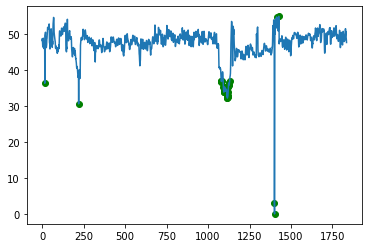

In [16]:
values = X[idx]

x_ax = range(len(X))

plt.plot(x_ax, X)
plt.scatter(idx,values, color='g')
plt.show()

In [17]:
#run for each sensor and get 2% of anomalies
#detect the points in time that appear as anomalies in at least 10% (varlable) and plot it

In [18]:
unique, counts = np.unique(idx, return_counts=True)
dict(zip(unique, counts))

{16: 1,
 220: 1,
 1079: 1,
 1080: 1,
 1081: 1,
 1082: 1,
 1092: 1,
 1094: 1,
 1095: 1,
 1096: 1,
 1097: 1,
 1100: 1,
 1101: 1,
 1106: 1,
 1107: 1,
 1113: 1,
 1114: 1,
 1115: 1,
 1116: 1,
 1117: 1,
 1118: 1,
 1119: 1,
 1120: 1,
 1121: 1,
 1122: 1,
 1123: 1,
 1124: 1,
 1125: 1,
 1126: 1,
 1127: 1,
 1128: 1,
 1129: 1,
 1130: 1,
 1400: 1,
 1401: 1,
 1413: 1,
 1426: 1}

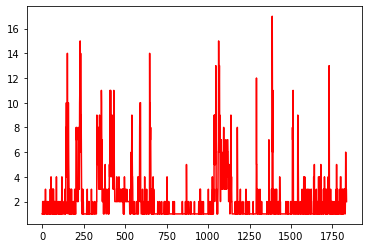

{0: 1, 1: 1, 2: 1, 3: 2, 4: 2, 5: 1, 6: 2, 7: 2, 8: 1, 9: 1, 10: 1, 11: 1, 12: 2, 13: 2, 14: 1, 15: 1, 16: 2, 17: 1, 18: 2, 19: 2, 20: 3, 21: 2, 22: 2, 23: 2, 24: 1, 25: 2, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 2, 32: 2, 33: 1, 34: 1, 35: 2, 36: 1, 37: 1, 38: 1, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 1, 45: 2, 46: 1, 47: 1, 48: 2, 49: 3, 50: 2, 51: 1, 52: 1, 53: 4, 54: 4, 55: 3, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1, 61: 3, 62: 3, 63: 2, 64: 1, 65: 1, 66: 3, 67: 1, 68: 3, 69: 2, 70: 1, 71: 1, 72: 1, 73: 2, 74: 1, 75: 1, 76: 2, 77: 1, 78: 2, 79: 1, 80: 1, 81: 1, 82: 1, 83: 1, 84: 1, 85: 1, 86: 4, 87: 1, 88: 2, 89: 1, 90: 1, 91: 1, 92: 1, 93: 1, 94: 1, 95: 1, 96: 1, 97: 1, 98: 2, 99: 2, 100: 1, 101: 1, 102: 1, 103: 2, 104: 1, 105: 1, 106: 1, 107: 1, 108: 1, 109: 1, 110: 2, 111: 1, 112: 1, 113: 1, 114: 2, 115: 1, 116: 1, 117: 1, 118: 3, 119: 4, 120: 2, 121: 1, 122: 1, 123: 2, 124: 2, 125: 2, 126: 2, 127: 1, 128: 1, 129: 1, 130: 1, 131: 1, 132: 1, 133: 1, 134: 1, 135: 1, 136: 2, 137: 3, 138: 

In [19]:
dict_result = {}

for i in range(len(X)):
    dict_result[i] = 0

for i in range(52):
    X = df.copy()
    X = X[['sensor_'+str(i).zfill(2)]]
    X = X.to_numpy()

    kern_dens = KernelDensity()
    kern_dens.fit(X)
    
    scores = kern_dens.score_samples(X)
    threshold = quantile(scores, .02)
    
    idx = where(scores <= threshold)
    
    values = X[idx]

    x_ax = range(len(X))

    #plt.plot(x_ax, X)
    #plt.scatter(idx,values, color='g')
    #plt.show()
    
    unique, counts = np.unique(idx, return_counts=True)
    #print(dict(zip(unique, counts)))
    temp_dict = dict(zip(unique, counts))
    
    #https://stackoverflow.com/questions/10461531/merge-and-sum-of-two-dictionaries
    dict_result = {k: temp_dict.get(k, 0) + dict_result.get(k, 0) for k in set(temp_dict) | set(dict_result)}

plt.plot(x_ax,dict_result.values(), color='r')
plt.show()
print(dict_result)

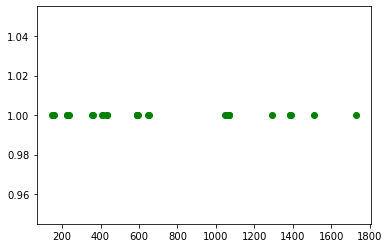

timestamp  sensor_00  sensor_01  sensor_02  sensor_03  \
146  2018-04-13 04:00:00   0.000000  45.143952  48.027705  41.696685   
152  2018-04-13 16:00:00   0.715638  54.201748  49.913194  43.622322   
158  2018-04-14 04:00:00   1.095466  48.233506  50.204353  42.528210   
226  2018-04-19 20:00:00   0.000000  38.365161  37.401981  34.789496   
227  2018-04-19 22:00:00   0.000000  37.702544  36.910445  34.323639   
228  2018-04-20 00:00:00   0.000000  37.813582  36.808087  34.351850   
229  2018-04-20 02:00:00   0.000000  37.929685  37.120224  34.871961   
232  2018-04-20 08:00:00   0.972368  47.692056  40.432218  36.775534   
233  2018-04-20 10:00:00   1.249585  48.187210  41.473884  38.504050   
357  2018-04-30 18:00:00   2.454162  46.025389  50.898435  43.104744   
358  2018-04-30 20:00:00   2.454047  45.244863  50.382302  41.109662   
409  2018-05-05 02:00:00   2.454162  45.834778  50.993197  42.889900   
413  2018-05-05 10:00:00   2.454072  47.153861  51.956741  45.441621   
432  2018-05-07 00:00:00   2.454072  48.162977  54.061775  45.880351   
433  2018-05-07 02:00:00   2.454154  47.893878  53.891420  45.753760   
590  2018-05-20 04:00:00   0.628695  41.878977  46.009474  38.288121   
591  2018-05-20 06:00:00   0.224838  42.736544  46.178746  38.979309   
592  2018-05-20 08:00:00   0.671244  42.807073  46.232638  39.875939   
593  2018-05-20 10:00:00   1.895882  44.380786  46.761790  41.394674   
648  2018-05-25 00:00:00   0.710563  48.010705  51.036963  43.102573   
650  2018-05-25 04:00:00   0.014076  47.505424  48.497177  44.175708   
1047 2018-06-27 06:00:00   2.354052  48.243996  50.464770  45.103080   
1064 2018-06-28 16:00:00   0.630786  45.843821  49.211153  43.422669   
1065 2018-06-28 18:00:00   0.432846  42.336153  46.665942  41.730322   
1067 2018-06-28 22:00:00   0.029743  40.740016  44.559460  40.391709   
1068 2018-06-29 00:00:00   0.019512  40.658275  42.693141  40.944733   
1069 2018-06-29 02:00:00   0.019463  40.889032  42.061269  40.946541   
1292 2018-07-17 16:00:00   1.250626  50.104165  48.272207  42.383173   
1387 2018-07-25 14:00:00   0.377696  46.440609  51.728875  45.684677   
1388 2018-07-25 16:00:00   0.369645  46.354527  50.432941  45.889394   
1391 2018-07-25 22:00:00   1.825426  52.433447  47.872539  43.742765   
1513 2018-08-05 02:00:00   2.489464  49.579353  52.091290  45.134185   
1730 2018-08-23 04:00:00   2.505229  50.930625  52.787180  45.611615   

       sensor_04  sensor_05  sensor_06  sensor_07  sensor_08  ...   sensor_42  \
146     3.142940   0.000000   7.472692  16.551651  16.668596  ...   69.244790   
152   307.973887  45.356564   9.632463  15.573700  15.105975  ...   92.200520   
158   145.884437  46.314761   8.888587  12.754569  12.985689  ...   33.734807   
226   203.254278   0.000000   3.936391   7.064042   7.187862  ...   78.949648   
227   203.248685   0.000000   5.057147   9.872143  10.133945  ...  121.569007   
228   203.409806   0.000000   5.058111   9.864125  10.143590  ...  112.098527   
229   203.196553   0.000000   5.055158   9.861654  10.136718  ...  306.015629   
232   410.389886  54.395971   9.149727  13.228562  13.750421  ...   49.394530   
233   450.088430  56.553562  13.114150  15.776367  15.204897  ...   43.329551   
357   631.307858  75.300132  13.585008  15.666293  15.672804  ...   32.196179   
358   634.260215  73.960949  13.375168  15.651584  15.190851  ...   30.128038   
409   632.204854  73.823083  13.110653  16.165905  14.922176  ...   31.681856   
413   631.887525  77.752308  13.208852  16.393832  15.069625  ...   35.277775   
432   631.913567  74.956684  13.199267  16.046849  15.189525  ...   35.069442   
433   631.485330  73.286810  13.095944  15.907117  15.177228  ...   33.990883   
590   450.980888  34.732947   8.825473  10.078366  10.138948  ...   27.834201   
591   344.713537  20.178639  10.077643  10.081680  10.138828  ...   43.598089   
592   355.538838  51.241265   9.457706  13.204631  13.342676  ...   77.235243   
593   530.074580  79.212009

In [20]:
scores = np.array(list(dict_result.values()))
threshold = 10 #52*0.2

idx = where(scores >= threshold)

values = np.zeros(len(X[idx])) + 1
x_ax = range(len(X))

plt.scatter(idx,values, color='g')
plt.show()

#print(idx[0])
df.reset_index().iloc[idx[0]]
#print(df[idx[0]])


In [21]:
df.reset_index().iloc[idx[0]].to_csv('kde_anomalies.csv')